In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.colors as mcolors
import matplotlib.cm
from matplotlib import rc
import math

rc('font', family='serif', size='10')
rc('axes', labelsize='medium')
rc('legend', numpoints=1)
rc('lines', linewidth=1)
rc('text', usetex=True)


In [3]:
s ="""250, 1000, 0.0: num invalid: 1, 
	 percent of 01-samples: 0.0, 
	 average distance 01: -1, 
	 average distance 23: 14.096
500, 1000, 0.0: num invalid: 1, 
	 percent of 01-samples: 0.0, 
	 average distance 01: -1, 
	 average distance 23: 2.242
750, 1000, 0.0: num invalid: 1, 
	 percent of 01-samples: 0.0, 
	 average distance 01: -1, 
	 average distance 23: 0.724
1000, 1000, 0.0: num invalid: 1, 
	 percent of 01-samples: 0.0, 
	 average distance 01: -1, 
	 average distance 23: 0.252
1250, 1000, 0.0: num invalid: 1, 
	 percent of 01-samples: 0.0, 
	 average distance 01: -1, 
	 average distance 23: 0.08
1500, 1000, 0.0: num invalid: 1, 
	 percent of 01-samples: 0.0, 
	 average distance 01: -1, 
	 average distance 23: 0.032
1750, 1000, 0.0: num invalid: 1, 
	 percent of 01-samples: 0.0, 
	 average distance 01: -1, 
	 average distance 23: 0.012
2000, 1000, 0.0: num invalid: 1, 
	 percent of 01-samples: 0.0, 
	 average distance 01: -1, 
	 average distance 23: 0.004
250, 1000, 0.1: num invalid: 498, 
	 percent of 01-samples: 0.3333333333333333, 
	 average distance 01: 53.0, 
	 average distance 23: 10.5
500, 1000, 0.1: num invalid: 343, 
	 percent of 01-samples: 0.0, 
	 average distance 01: -1, 
	 average distance 23: 1.8417721518987342
750, 1000, 0.1: num invalid: 134, 
	 percent of 01-samples: 0.01907356948228883, 
	 average distance 01: 4.142857142857143, 
	 average distance 23: 0.6222222222222222
1000, 1000, 0.1: num invalid: 53, 
	 percent of 01-samples: 0.05580357142857143, 
	 average distance 01: 1.52, 
	 average distance 23: 0.2033096926713948
1250, 1000, 0.1: num invalid: 24, 
	 percent of 01-samples: 0.0649895178197065, 
	 average distance 01: 0.2903225806451613, 
	 average distance 23: 0.04708520179372197
1500, 1000, 0.1: num invalid: 12, 
	 percent of 01-samples: 0.07157464212678936, 
	 average distance 01: 0.11428571428571428, 
	 average distance 23: 0.019823788546255508
1750, 1000, 0.1: num invalid: 10, 
	 percent of 01-samples: 0.10590631364562118, 
	 average distance 01: 0.019230769230769232, 
	 average distance 23: 0.0
2000, 1000, 0.1: num invalid: 4, 
	 percent of 01-samples: 0.1006036217303823, 
	 average distance 01: 0.04, 
	 average distance 23: 0.0
250, 1000, 0.2: num invalid: 498, 
	 percent of 01-samples: 0.0, 
	 average distance 01: -1, 
	 average distance 23: 8.0
500, 1000, 0.2: num invalid: 345, 
	 percent of 01-samples: 0.02564102564102564, 
	 average distance 01: 6.0, 
	 average distance 23: 2.2039473684210527
750, 1000, 0.2: num invalid: 144, 
	 percent of 01-samples: 0.10364145658263306, 
	 average distance 01: 1.945945945945946, 
	 average distance 23: 0.65625
1000, 1000, 0.2: num invalid: 51, 
	 percent of 01-samples: 0.1511111111111111, 
	 average distance 01: 0.5441176470588235, 
	 average distance 23: 0.20680628272251309
1250, 1000, 0.2: num invalid: 25, 
	 percent of 01-samples: 0.18487394957983194, 
	 average distance 01: 0.22727272727272727, 
	 average distance 23: 0.06958762886597938
1500, 1000, 0.2: num invalid: 12, 
	 percent of 01-samples: 0.17586912065439672, 
	 average distance 01: 0.06976744186046512, 
	 average distance 23: 0.02481389578163772
1750, 1000, 0.2: num invalid: 5, 
	 percent of 01-samples: 0.16330645161290322, 
	 average distance 01: 0.04938271604938271, 
	 average distance 23: 0.0
2000, 1000, 0.2: num invalid: 3, 
	 percent of 01-samples: 0.20682730923694778, 
	 average distance 01: 0.009708737864077669, 
	 average distance 23: 0.0
250, 1000, 0.3: num invalid: 496, 
	 percent of 01-samples: 0.0, 
	 average distance 01: -1, 
	 average distance 23: 12.4
500, 1000, 0.3: num invalid: 369, 
	 percent of 01-samples: 0.06818181818181818, 
	 average distance 01: 4.555555555555555, 
	 average distance 23: 2.105691056910569
750, 1000, 0.3: num invalid: 145, 
	 percent of 01-samples: 0.27808988764044945, 
	 average distance 01: 1.2222222222222223, 
	 average distance 23: 0.7276264591439688
1000, 1000, 0.3: num invalid: 56, 
	 percent of 01-samples: 0.19550561797752808, 
	 average distance 01: 0.4942528735632184, 
	 average distance 23: 0.2430167597765363
1250, 1000, 0.3: num invalid: 25, 
	 percent of 01-samples: 0.24789915966386555, 
	 average distance 01: 0.16101694915254236, 
	 average distance 23: 0.09217877094972067
1500, 1000, 0.3: num invalid: 9, 
	 percent of 01-samples: 0.31097560975609756, 
	 average distance 01: 0.0718954248366013, 
	 average distance 23: 0.02359882005899705
1750, 1000, 0.3: num invalid: 6, 
	 percent of 01-samples: 0.24444444444444444, 
	 average distance 01: 0.01652892561983471, 
	 average distance 23: 0.0
2000, 1000, 0.3: num invalid: 3, 
	 percent of 01-samples: 0.2971887550200803, 
	 average distance 01: 0.013513513513513514, 
	 average distance 23: 0.0
500, 1000, 0.4: num invalid: 375, 
	 percent of 01-samples: 0.16666666666666666, 
	 average distance 01: 2.3333333333333335, 
	 average distance 23: 2.6952380952380954
750, 1000, 0.4: num invalid: 154, 
	 percent of 01-samples: 0.345821325648415, 
	 average distance 01: 0.8583333333333333, 
	 average distance 23: 0.7444933920704846
1000, 1000, 0.4: num invalid: 64, 
	 percent of 01-samples: 0.36155606407322655, 
	 average distance 01: 0.25316455696202533, 
	 average distance 23: 0.25806451612903225
1250, 1000, 0.4: num invalid: 27, 
	 percent of 01-samples: 0.32489451476793246, 
	 average distance 01: 0.08441558441558442, 
	 average distance 23: 0.09375
1500, 1000, 0.4: num invalid: 10, 
	 percent of 01-samples: 0.3604887983706721, 
	 average distance 01: 0.05649717514124294, 
	 average distance 23: 0.025477707006369428
1750, 1000, 0.4: num invalid: 5, 
	 percent of 01-samples: 0.3588709677419355, 
	 average distance 01: 0.02247191011235955, 
	 average distance 23: 0.0
2000, 1000, 0.4: num invalid: 4, 
	 percent of 01-samples: 0.37424547283702214, 
	 average distance 01: 0.010752688172043012, 
	 average distance 23: 0.0
500, 1000, 0.5: num invalid: 394, 
	 percent of 01-samples: 0.3644859813084112, 
	 average distance 01: 2.6666666666666665, 
	 average distance 23: 3.323529411764706
750, 1000, 0.5: num invalid: 166, 
	 percent of 01-samples: 0.42686567164179107, 
	 average distance 01: 0.7902097902097902, 
	 average distance 23: 0.8854166666666666
1000, 1000, 0.5: num invalid: 60, 
	 percent of 01-samples: 0.4376417233560091, 
	 average distance 01: 0.30569948186528495, 
	 average distance 23: 0.2903225806451613
1250, 1000, 0.5: num invalid: 29, 
	 percent of 01-samples: 0.4682203389830508, 
	 average distance 01: 0.12217194570135746, 
	 average distance 23: 0.10756972111553785
1500, 1000, 0.5: num invalid: 13, 
	 percent of 01-samples: 0.4672131147540984, 
	 average distance 01: 0.043859649122807015, 
	 average distance 23: 0.03076923076923077
1750, 1000, 0.5: num invalid: 5, 
	 percent of 01-samples: 0.4274193548387097, 
	 average distance 01: 0.014150943396226415, 
	 average distance 23: 0.0
2000, 1000, 0.5: num invalid: 4, 
	 percent of 01-samples: 0.4688128772635815, 
	 average distance 01: 0.008583690987124463, 
	 average distance 23: 0.0
250, 1000, 0.6: num invalid: 500, 
	 percent of 01-samples: 1.0, 
	 average distance 01: 23.0, 
	 average distance 23: -1
500, 1000, 0.6: num invalid: 395, 
	 percent of 01-samples: 0.6792452830188679, 
	 average distance 01: 2.2222222222222223, 
	 average distance 23: 4.470588235294118
750, 1000, 0.6: num invalid: 172, 
	 percent of 01-samples: 0.5531914893617021, 
	 average distance 01: 0.5879120879120879, 
	 average distance 23: 1.1224489795918366
1000, 1000, 0.6: num invalid: 62, 
	 percent of 01-samples: 0.5444191343963554, 
	 average distance 01: 0.24267782426778242, 
	 average distance 23: 0.375
1250, 1000, 0.6: num invalid: 26, 
	 percent of 01-samples: 0.5768421052631579, 
	 average distance 01: 0.10218978102189781, 
	 average distance 23: 0.11442786069651742
1500, 1000, 0.6: num invalid: 10, 
	 percent of 01-samples: 0.560081466395112, 
	 average distance 01: 0.02181818181818182, 
	 average distance 23: 0.037037037037037035
1750, 1000, 0.6: num invalid: 5, 
	 percent of 01-samples: 0.5564516129032258, 
	 average distance 01: 0.010869565217391304, 
	 average distance 23: 0.02727272727272727
2000, 1000, 0.6: num invalid: 3, 
	 percent of 01-samples: 0.5562248995983936, 
	 average distance 01: 0.010830324909747292, 
	 average distance 23: 0.0
250, 1000, 0.7: num invalid: 500, 
	 percent of 01-samples: 1.0, 
	 average distance 01: 19.0, 
	 average distance 23: -1
500, 1000, 0.7: num invalid: 366, 
	 percent of 01-samples: 0.8666666666666667, 
	 average distance 01: 2.1794871794871793, 
	 average distance 23: 5.944444444444445
750, 1000, 0.7: num invalid: 183, 
	 percent of 01-samples: 0.7421383647798742, 
	 average distance 01: 0.3983050847457627, 
	 average distance 23: 1.6097560975609757
1000, 1000, 0.7: num invalid: 54, 
	 percent of 01-samples: 0.6756152125279642, 
	 average distance 01: 0.2682119205298013, 
	 average distance 23: 0.45517241379310347
1250, 1000, 0.7: num invalid: 23, 
	 percent of 01-samples: 0.6841004184100419, 
	 average distance 01: 0.09480122324159021, 
	 average distance 23: 0.17218543046357615
1500, 1000, 0.7: num invalid: 9, 
	 percent of 01-samples: 0.693089430894309, 
	 average distance 01: 0.026392961876832845, 
	 average distance 23: 0.039735099337748346
1750, 1000, 0.7: num invalid: 4, 
	 percent of 01-samples: 0.6599597585513078, 
	 average distance 01: 0.021341463414634148, 
	 average distance 23: 0.0
2000, 1000, 0.7: num invalid: 2, 
	 percent of 01-samples: 0.6913827655310621, 
	 average distance 01: 0.014492753623188406, 
	 average distance 23: 0.0
500, 1000, 0.8: num invalid: 364, 
	 percent of 01-samples: 0.948905109489051, 
	 average distance 01: 1.5692307692307692, 
	 average distance 23: 7.428571428571429
750, 1000, 0.8: num invalid: 173, 
	 percent of 01-samples: 0.8658536585365854, 
	 average distance 01: 0.41901408450704225, 
	 average distance 23: 2.3636363636363638
1000, 1000, 0.8: num invalid: 49, 
	 percent of 01-samples: 0.8296460176991151, 
	 average distance 01: 0.232, 
	 average distance 23: 0.6883116883116883
1250, 1000, 0.8: num invalid: 23, 
	 percent of 01-samples: 0.7782426778242678, 
	 average distance 01: 0.08602150537634409, 
	 average distance 23: 0.16037735849056603
1500, 1000, 0.8: num invalid: 8, 
	 percent of 01-samples: 0.7748478701825557, 
	 average distance 01: 0.028795811518324606, 
	 average distance 23: 0.05405405405405406
1750, 1000, 0.8: num invalid: 3, 
	 percent of 01-samples: 0.7730923694779116, 
	 average distance 01: 0.023376623376623377, 
	 average distance 23: 0.0
2000, 1000, 0.8: num invalid: 2, 
	 percent of 01-samples: 0.7715430861723447, 
	 average distance 01: 0.01818181818181818, 
	 average distance 23: 0.0
250, 1000, 0.9: num invalid: 498, 
	 percent of 01-samples: 0.6666666666666666, 
	 average distance 01: 4.0, 
	 average distance 23: 59.0
500, 1000, 0.9: num invalid: 330, 
	 percent of 01-samples: 0.9883040935672515, 
	 average distance 01: 1.544378698224852, 
	 average distance 23: 14.5
750, 1000, 0.9: num invalid: 123, 
	 percent of 01-samples: 0.9232804232804233, 
	 average distance 01: 0.6332378223495702, 
	 average distance 23: 3.9310344827586206
1000, 1000, 0.9: num invalid: 48, 
	 percent of 01-samples: 0.8741721854304636, 
	 average distance 01: 0.2222222222222222, 
	 average distance 23: 1.2456140350877194
1250, 1000, 0.9: num invalid: 15, 
	 percent of 01-samples: 0.8888888888888888, 
	 average distance 01: 0.08564814814814815, 
	 average distance 23: 0.4074074074074074
1500, 1000, 0.9: num invalid: 8, 
	 percent of 01-samples: 0.896551724137931, 
	 average distance 01: 0.024886877828054297, 
	 average distance 23: 0.29411764705882354
1750, 1000, 0.9: num invalid: 4, 
	 percent of 01-samples: 0.8893360160965795, 
	 average distance 01: 0.020361990950226245, 
	 average distance 23: 0.07272727272727272
2000, 1000, 0.9: num invalid: 3, 
	 percent of 01-samples: 0.8714859437751004, 
	 average distance 01: 0.009216589861751152, 
	 average distance 23: 0.0
250, 1000, 1.0: num invalid: 1, 
	 percent of 01-samples: 1.0, 
	 average distance 01: 10.136, 
	 average distance 23: -1
500, 1000, 1.0: num invalid: 1, 
	 percent of 01-samples: 1.0, 
	 average distance 01: 2.08, 
	 average distance 23: -1
750, 1000, 1.0: num invalid: 1, 
	 percent of 01-samples: 1.0, 
	 average distance 01: 0.624, 
	 average distance 23: -1
1000, 1000, 1.0: num invalid: 1, 
	 percent of 01-samples: 1.0, 
	 average distance 01: 0.232, 
	 average distance 23: -1
1250, 1000, 1.0: num invalid: 1, 
	 percent of 01-samples: 1.0, 
	 average distance 01: 0.076, 
	 average distance 23: -1
1500, 1000, 1.0: num invalid: 1, 
	 percent of 01-samples: 1.0, 
	 average distance 01: 0.022, 
	 average distance 23: -1
1750, 1000, 1.0: num invalid: 1, 
	 percent of 01-samples: 1.0, 
	 average distance 01: 0.018, 
	 average distance 23: -1
2000, 1000, 1.0: num invalid: 1, 
	 percent of 01-samples: 1.0, 
	 average distance 01: 0.01, 
	 average distance 23: -1"""

In [4]:
def get_data(curr):
    c = curr.split("\n")
    a = c[0].split(": ")
    iters = int(a[0].split(', ')[0])
    n = int(a[0].split(', ')[1])
    p = float(a[0].split(", ")[2])
    p01 = float(c[1].split(": ")[-1][:-2])
    avg_d01 = float(c[2].split(": ")[-1][:-2])
    avg_d23 = float(c[3].split(": ")[-1])
    inv = int(a[-1][:-2])
    return (iters, n, p, inv, p01, avg_d01, avg_d23)

In [5]:
v = s.split('\n')
vals = []
for i in range(len(v)//4):
    curr = []
    curr.append(v[i*4])
    curr.append(v[i*4+1])
    curr.append(v[i*4+2])
    curr.append(v[i*4+3])
    vals.append('\n'.join(curr))
print(vals)

d = {}
nset = set()
pset = set()
iterset = set()
for v in vals:
    iters, n, p, inv, p01, avg_d01, avg_d23 = get_data(v)
    nset.add(n)
    iterset.add(iters)
    pset.add(p)
    p01_amended = p01 * 1000 / (1000 - inv)
    if p not in d:
        d[p] = {}
    d[p][iters] = (p01_amended, avg_d01, avg_d23)
print(d)

['250, 1000, 0.0: num invalid: 1, \n\t percent of 01-samples: 0.0, \n\t average distance 01: -1, \n\t average distance 23: 14.096', '500, 1000, 0.0: num invalid: 1, \n\t percent of 01-samples: 0.0, \n\t average distance 01: -1, \n\t average distance 23: 2.242', '750, 1000, 0.0: num invalid: 1, \n\t percent of 01-samples: 0.0, \n\t average distance 01: -1, \n\t average distance 23: 0.724', '1000, 1000, 0.0: num invalid: 1, \n\t percent of 01-samples: 0.0, \n\t average distance 01: -1, \n\t average distance 23: 0.252', '1250, 1000, 0.0: num invalid: 1, \n\t percent of 01-samples: 0.0, \n\t average distance 01: -1, \n\t average distance 23: 0.08', '1500, 1000, 0.0: num invalid: 1, \n\t percent of 01-samples: 0.0, \n\t average distance 01: -1, \n\t average distance 23: 0.032', '1750, 1000, 0.0: num invalid: 1, \n\t percent of 01-samples: 0.0, \n\t average distance 01: -1, \n\t average distance 23: 0.012', '2000, 1000, 0.0: num invalid: 1, \n\t percent of 01-samples: 0.0, \n\t average dista

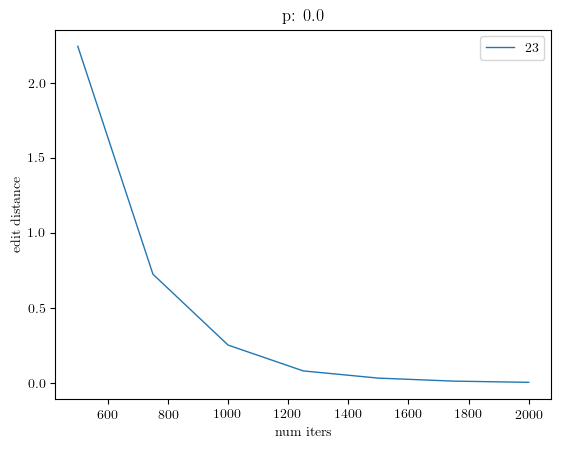

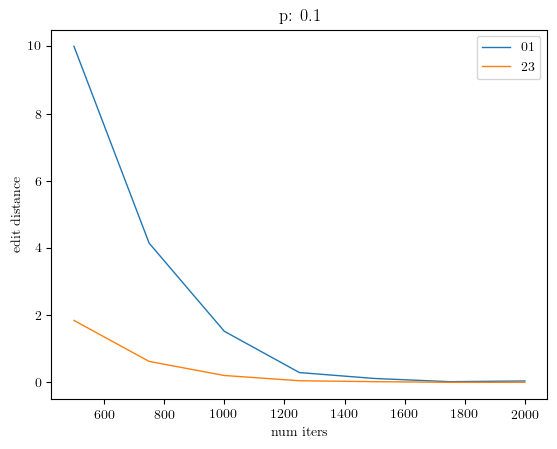

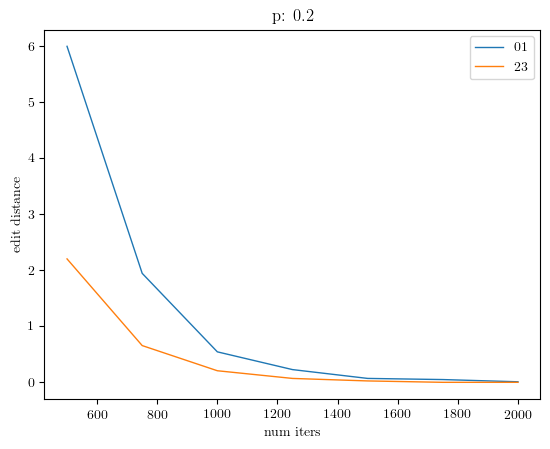

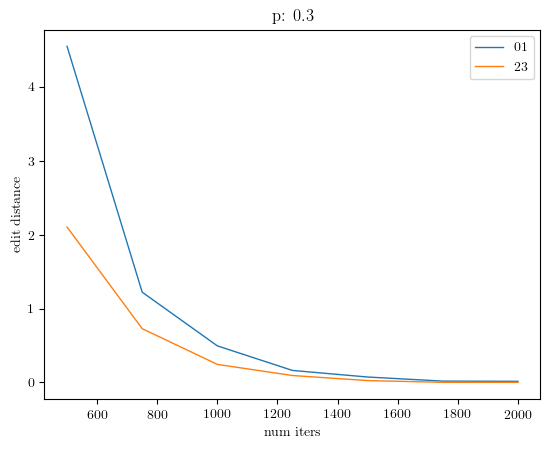

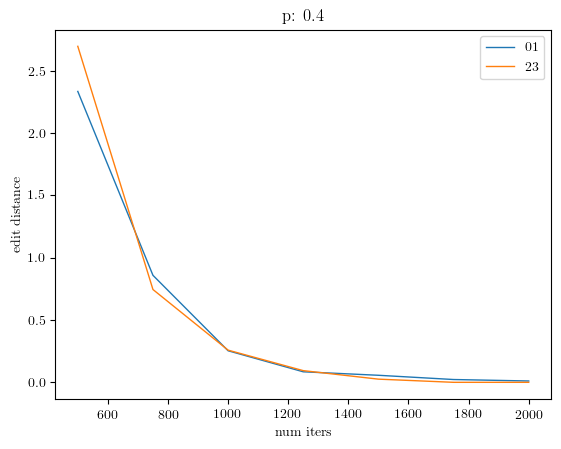

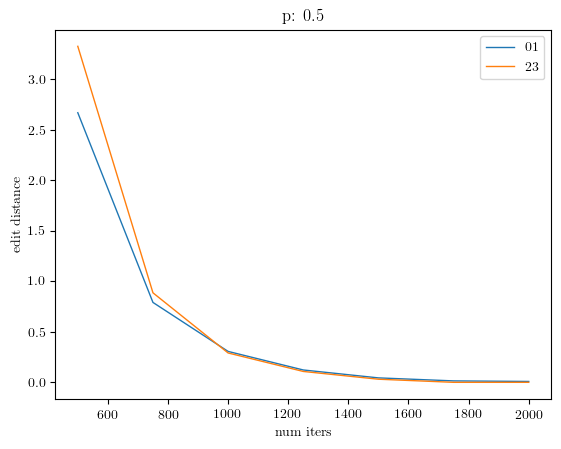

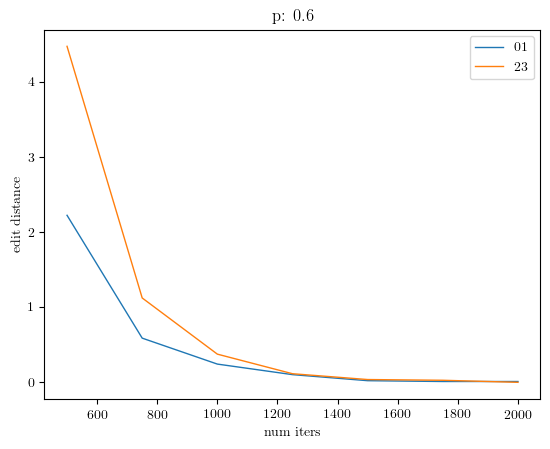

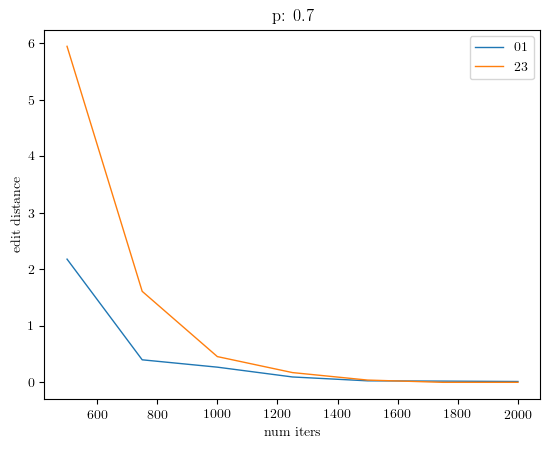

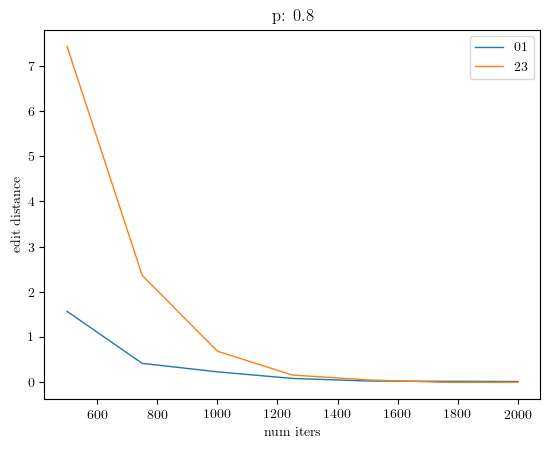

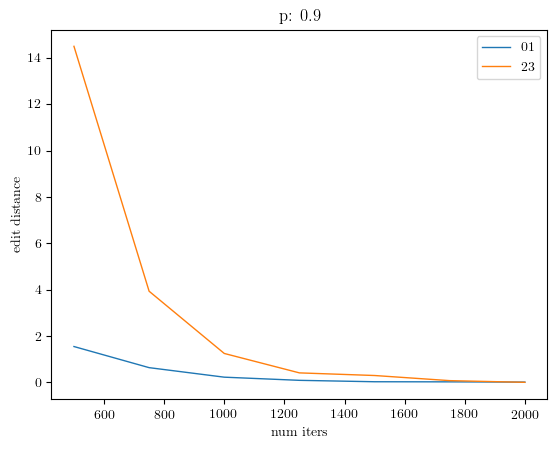

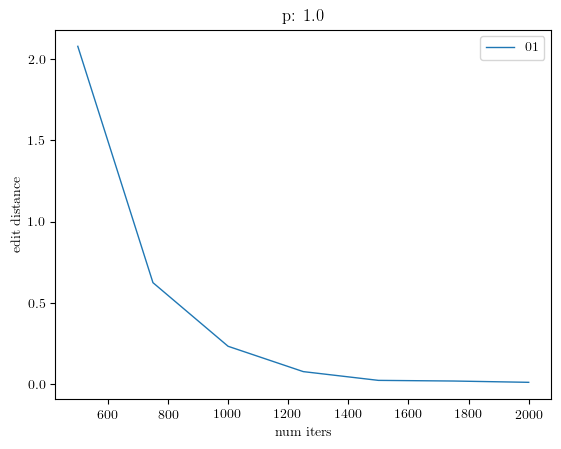

In [9]:
ns = sorted(list(nset))
log_ns = list(map(lambda x: math.log(x, 10), ns))
iters_list = sorted(list(iterset))[1:]
ps = sorted(list(pset))
for i in range(len(ps)):
    p = ps[i]
    dists01 = []
    dists23 = []
    if p not in d:
        continue
    for iter in iters_list:
        if iter not in d[p]:
            continue
        if d[p][iter][1] == -1:
            dists01.append(10)
        else:
            dists01.append(d[p][iter][1])
        if d[p][iter][2] == -1:
            dists23.append(10)
        else:
            dists23.append(d[p][iter][2])
    if i != 0:
        plt.plot(iters_list[:len(dists01)], dists01, label=f"01")
    if i != len(ps) - 1:
        plt.plot(iters_list[:len(dists23)], dists23, label=f"23")
    plt.title(f"p: {p}")
    plt.xlabel("num iters")
    plt.ylabel("edit distance")
    plt.legend()
    plt.show()
# plt.legend()
# plt.xlabel("$log_{10}$ dataset size")
# plt.ylabel("average edit distance to correct pattern")
# plt.title("average edit distance as a function of dataset size, for various biases $p$")
# plt.show()

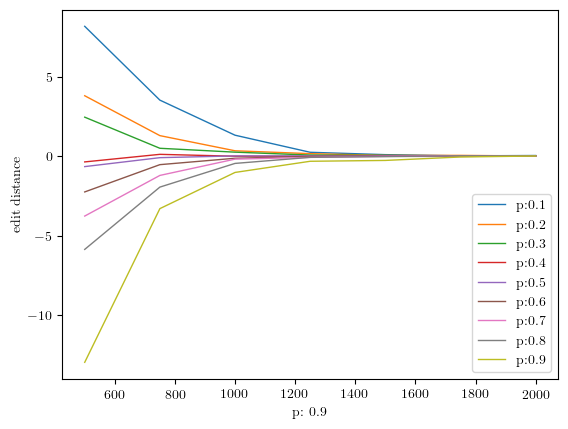

In [13]:
for i in range(1, len(ps)-1):
    p = ps[i]
    dists01 = []
    dists23 = []
    diffs = []
    if p not in d:
        continue
    for iter in iters_list:
        if iter not in d[p]:
            continue
        if d[p][iter][1] == -1:
            dists01.append(10)
        else:
            dists01.append(d[p][iter][1])
        if d[p][iter][2] == -1:
            dists23.append(10)
        else:
            dists23.append(d[p][iter][2])
        diffs.append(dists01[-1] - dists23[-1])
    plt.plot(iters_list[:len(dists01)], diffs, label=f"p:{p}")
plt.xlabel(f"p: {p}")
plt.ylabel("edit distance")
plt.legend()
plt.show()

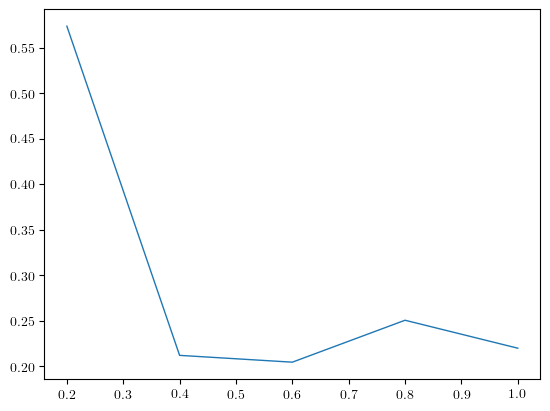

In [53]:
for i in range(len(ns)):
    n = ns[i]
    dists = []
    for p in ps:
        dists.append(d[p][n][1])
    plt.plot(ps[1:], dists[1:], label=f"p:{p}")
# plt.legend()
# plt.ylabel("$log_{10}$ dataset size")
# plt.xlabel("average edit distance to correct pattern")
# plt.title("average edit distance as a function of dataset size, for various biases $p$")
plt.show()

In [27]:
acc_01 = d[1][2000][1]
acc_23 = d[0][2000][2]
print(acc_01, acc_23)

req_iters = []
for p in ps[1:-1]:
    req_acc = acc_23*p + acc_01*(1-p)
    found = False
    for k in d[p]:
        curr_acc = d[p][k][2]*p + d[p][k][1]*(1-p)
        if curr_acc <= req_acc:
            req_iters.append(k)
            found = True
    if not found:
        req_iters.append(-1)
print(req_iters)

0.01 0.004
[500, 2000, -1, 2000, 2000, 2000, 2000, 1750, 2000, 2000]
